In [1]:
import compyler as cp

In [2]:
plan = cp.CKKSplan()

a = plan.add("a", 30)

In [3]:
b = (-a + 2)
c = a + 0

for i in range(13):
    c = c * (-c + 2)
    b = b * (-c + 2)

In [4]:
plan.compile(b);

Rebuilding the graph...
Executing what possible...
Inserting relinearize nodes...
Padding with copies...


In [5]:
plan.get_params()

(32768, [60, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40], [60])

In [6]:
import numpy as np
plain_a = np.linspace(2**(-3), 1, plan.slots)

In [7]:
plain_a

array([0.125     , 0.12505341, 0.12510682, ..., 0.99989318, 0.99994659,
       1.        ])

In [8]:
plain_result = plan.plain_compute({"a": plain_a})

In [9]:
ckks_result = plan.seal_compute({"a": plain_a})

In [10]:
plain_result

array([8.        , 7.99658328, 7.99316948, ..., 1.00010683, 1.00005341,
       1.        ])

In [11]:
ckks_result

array([7.60874327, 7.60512582, 7.60229507, ..., 0.9511911 , 0.95114139,
       0.95110586])

In [12]:
import matplotlib.pyplot as plt

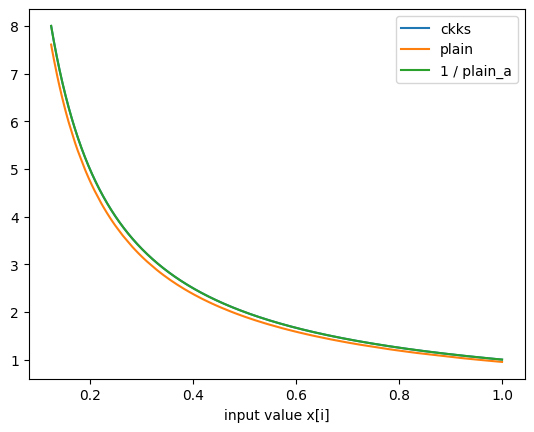

In [13]:
plt.plot(plain_a, plain_result, label="ckks")
plt.plot(plain_a, ckks_result, label="plain")

plt.plot(plain_a, 1 / plain_a, label="1 / plain_a")

plt.xlabel("input value x[i]")
plt.legend()

In [14]:
error = np.abs((ckks_result - plain_result) / plain_result)

In [15]:
all(error < 1e-3)

False

In [16]:
np.mean(error)

0.0489023235493724

In [17]:
np.std(error)

2.5609663060143827e-05

Text(0.5, 1.0, 'rellative error, (ckks_result - plain_result) / plain_result')

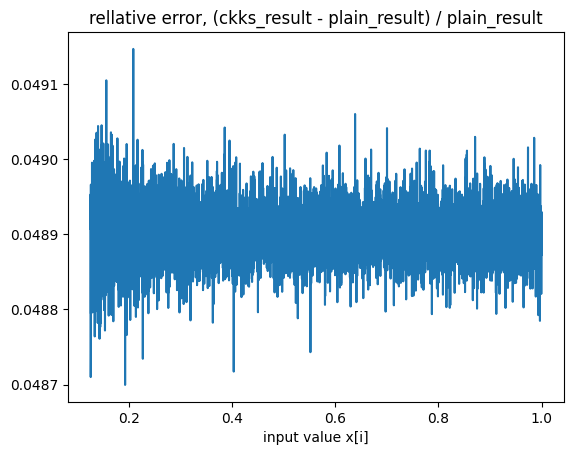

In [18]:
plt.plot(plain_a, error)
plt.xlabel("input value x[i]")
plt.title("rellative error, (ckks_result - plain_result) / plain_result")